In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
df = pd.read_parquet("./clean")

In [3]:
df.head()

,date,account,amount,brand,category,item,payee,quantity,share,unit
0,2017-10-15,Cash,-4700.0,None,Transportation,Transportation,SRTGN,NaN,NaN,None
1,2017-10-15,Cash,-4560.0,Alufoil,Household,Aluminium foil,Carrefour,20.0,NaN,m
2,2017-10-15,Cash,-3400.0,Carrefour,Household,Baby wipes,Carrefour,80.0,NaN,unit
3,2017-10-15,Cash,-920.0,Délice,Food,Buttermilk,Carrefour,450.0,NaN,g
4,2017-10-15,Cash,-920.0,Délice,Food,Raieb,Carrefour,450.0,NaN,g


In [4]:
df["week"] = df.date.apply(lambda x: x.week)

In [5]:
expenses = df[["week", "amount"]][df.amount < 0]

In [18]:
expenses.dropna(inplace=True)

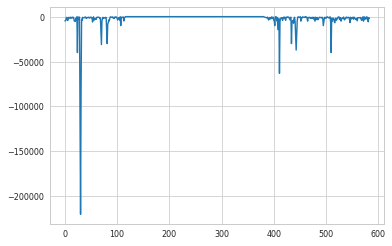

In [19]:
expenses.amount.plot()

In [7]:
upper = expenses.amount.quantile(0.75)
lower = expenses.amount.quantile(0.25)

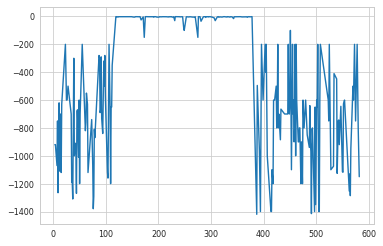

In [42]:
expenses = expenses[(expenses.amount < upper) & (expenses.amount > lower )]
expenses.amount.plot()

In [33]:
weekly_expenses = expenses.groupby("week").aggregate("sum")

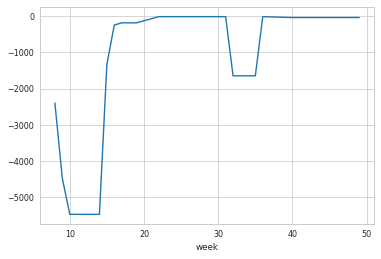

In [34]:
weekly_expenses.amount.rolling(7).median().plot()

In [37]:
weekly_expenses.amount.describe()

count       32.000000
mean     -3926.446250
std       6133.538501
min     -25333.260000
25%      -5767.750000
50%       -473.900000
75%        -14.135000
max         -3.000000
Name: amount, dtype: float64

In [40]:
weekly_expenses

,amount
week,
1.0,-29.70
3.0,-4475.00
4.0,-2400.00
5.0,-11556.70
6.0,-700.00
7.0,-11.30
8.0,-25333.26
9.0,-16166.85
10.0,-5472.00
